In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import shap
import matplotlib

c:\Users\mpuig\Documents\Uni\Datathon25\Datathon-Schneider-Electric\.pixi\envs\default\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\mpuig\Documents\Uni\Datathon25\Datathon-Schneider-Electric\.pixi\envs\default\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


%Exits amb tots els atributs = 0.832497678737233


100%|===================| 21508/21540 [02:37<00:00]        

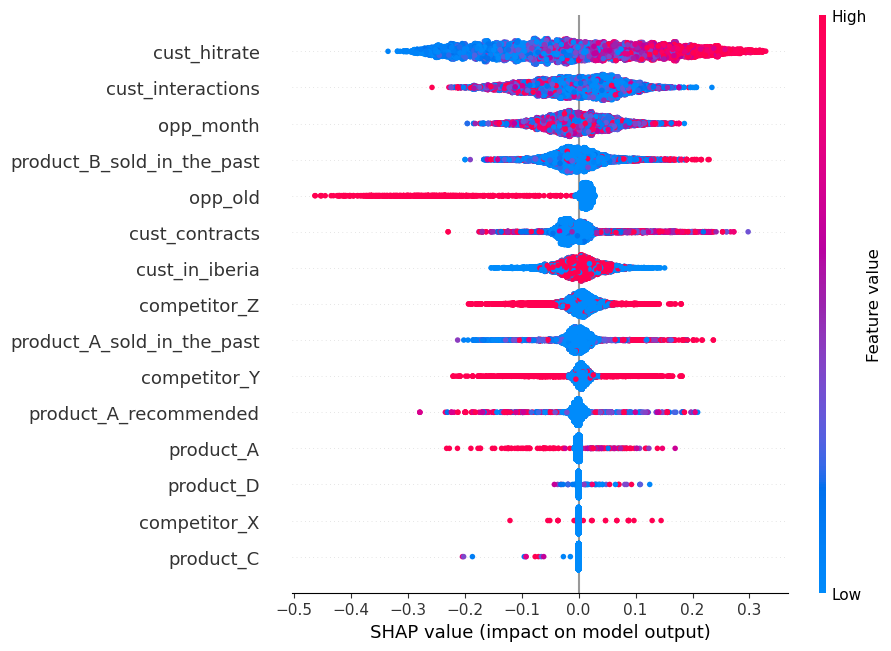

In [25]:
X = pd.read_csv("dataset.csv", usecols=range(1,16))
y = pd.read_csv("dataset.csv", usecols = [16])
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
Rf = RandomForestClassifier(n_estimators=15)
Rf.fit(X_Train,y_train)
Exits = Rf.score(X_Test,y_test)
print(f"%Exits amb tots els atributs =", Exits)
explainer = shap.TreeExplainer(Rf, X_Train)
shap_values = explainer(X_Test, check_additivity=False)
shap.plots.beeswarm(shap_values[:,:,1], max_display=16)

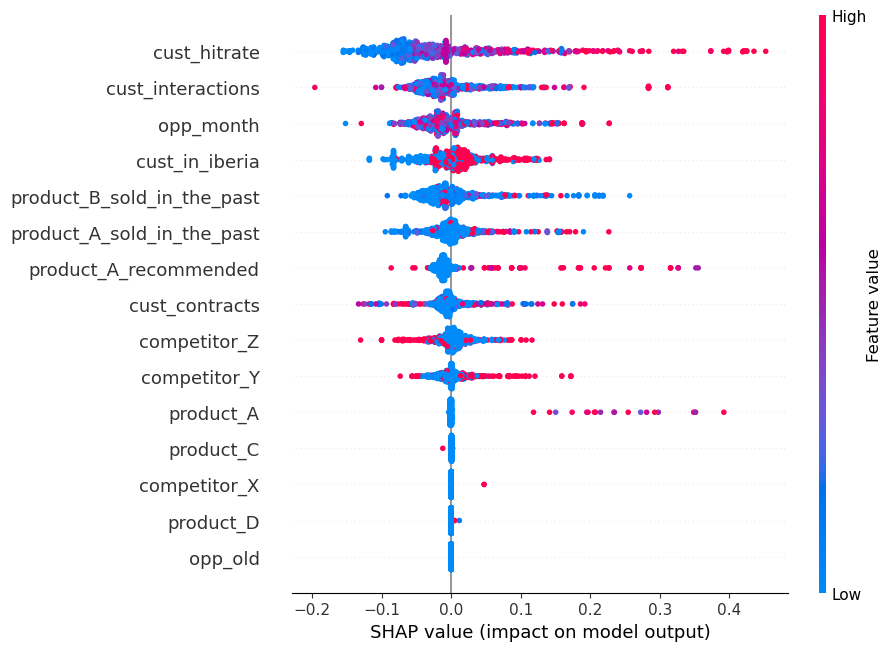

In [24]:
Older = pd.read_csv("dataset.csv", usecols=range(1,17))
Older = Older[Older["opp_old"] > Older["opp_old"].quantile(0.85)]
X_old = Older.drop("target_variable", axis=1)
y_old = Older["target_variable"]
X_old_Train, X_old_Test, y_old_train, y_old_test = train_test_split(X_old, y_old, test_size = 0.3, random_state = 1)
Rf_old = RandomForestClassifier(n_estimators=10)
Rf_old.fit(X_old_Train,y_old_train)
explainer_old = shap.TreeExplainer(Rf_old, X_old_Train)
shap_values_old = explainer_old(X_old_Test, check_additivity=False)
shap.plots.beeswarm(shap_values_old[:,:,1], max_display=16)

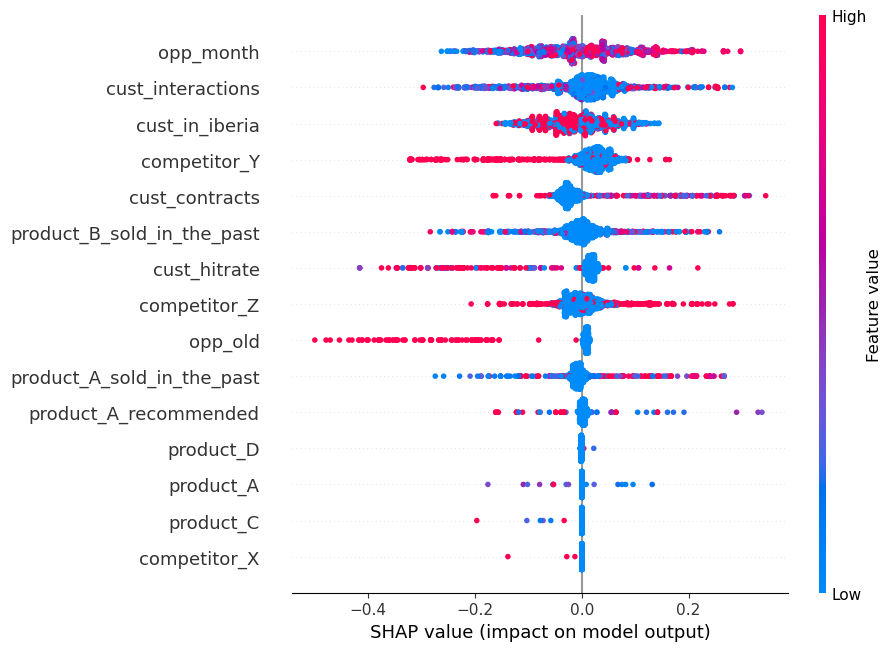

In [23]:
Low_hitr = pd.read_csv("dataset.csv", usecols=range(1,17))
Low_hitr = Low_hitr[Low_hitr["cust_hitrate"] < Low_hitr["cust_hitrate"].quantile(0.15)]
X_low = Low_hitr.drop("target_variable", axis=1)
y_low = Low_hitr["target_variable"]
X_low_Train, X_low_Test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size = 0.3, random_state = 1)
Rf_low = RandomForestClassifier(n_estimators=10)
Rf_low.fit(X_low_Train,y_low_train)
explainer_low = shap.TreeExplainer(Rf_low, X_low_Train)
shap_values_low = explainer_low(X_low_Test, check_additivity=False)
shap.plots.beeswarm(shap_values_low[:,:,1], max_display=16)

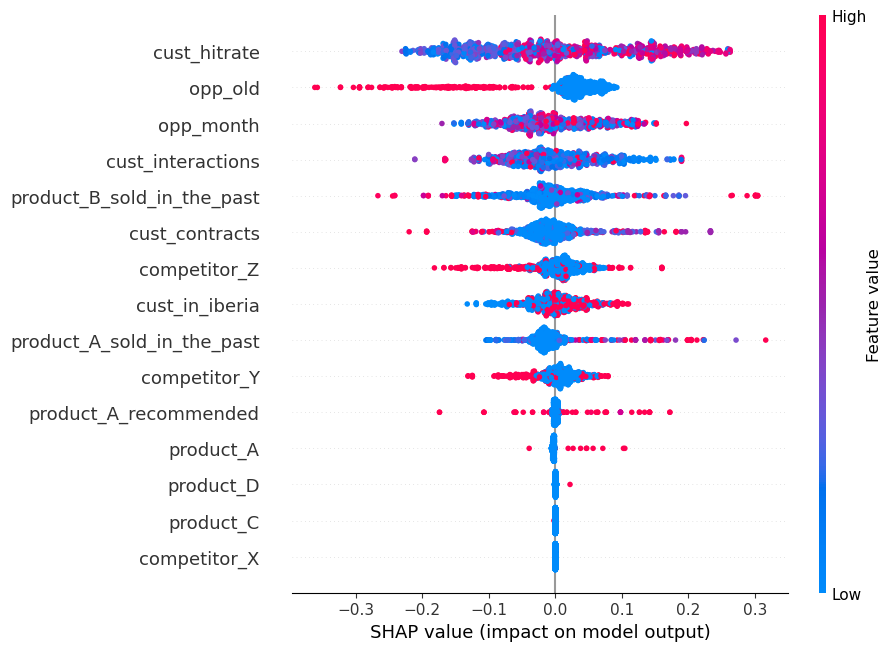

In [26]:
Inter = pd.read_csv("dataset.csv", usecols=range(1,17))
Inter = Inter[Inter["cust_interactions"] > Inter["cust_interactions"].quantile(0.9)]
X_inter = Inter.drop("target_variable", axis=1)
y_inter = Inter["target_variable"]
X_inter_Train, X_inter_Test, y_inter_train, y_inter_test = train_test_split(X_inter, y_inter, test_size = 0.3, random_state = 1)
Rf_inter = RandomForestClassifier(n_estimators=10)
Rf_inter.fit(X_inter_Train,y_inter_train)
explainer_inter = shap.TreeExplainer(Rf_inter, X_inter_Train)
shap_values_inter = explainer_inter(X_inter_Test, check_additivity=False)
shap.plots.beeswarm(shap_values_inter[:,:,1], max_display=16)